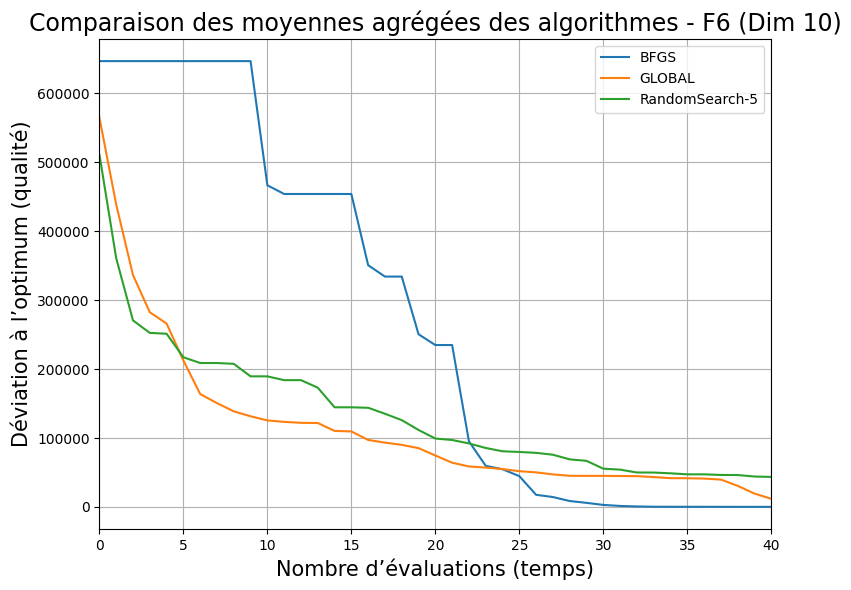

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

def parse_bbob_file(filepath):
    runs = []
    with open(filepath, 'r') as f:
        content = f.read()

    raw_runs = re.split(r'% function evaluation.+?\n', content)[1:]
    for raw in raw_runs:
        lines = raw.strip().split("\n")
        data = []
        for line in lines:
            if not line.strip() or line.startswith('%'):
                continue
            parts = line.strip().split()
            parts = [float(p.replace("+", "")) for p in parts]
            data.append(parts)
        if not data:
            continue
        df = pd.DataFrame(data)
        dim = df.shape[1] - 5
        df.columns = ['eval', 'noise_free_fitness', 'best_nf_fitness', 'measured_fitness', 'best_measured_fitness'] + [f'x{i+1}' for i in range(dim)]
        runs.append(df)
    return runs

def plot_aggregated_means_all_algos(algo_runs_dict, xlim_max=None):
    """
    Affiche les courbes moyennes agrégées de chaque algorithme.

    algo_runs_dict : dictionnaire { 'NomAlgo': runs_list }
    xlim_max : optionnel, limite de l’axe X (nombre d’évaluations)
    """
    plt.figure(figsize=(8, 6))

    for algo_name, runs in algo_runs_dict.items():
        if not runs:
            continue
        all_curves = []
        max_len = max(len(run) for run in runs)

        for run in runs:
            series = run['best_nf_fitness']
            interpolated = np.interp(np.linspace(0, len(series) - 1, max_len), np.arange(len(series)), series)
            all_curves.append(interpolated)

        all_curves = np.array(all_curves)
        mean_curve = np.mean(all_curves, axis=0)
        x = range(max_len)

        plt.plot(x, mean_curve, label=algo_name)

    plt.title("Comparaison des moyennes agrégées des algorithmes - F6 (Dim 10)", fontsize=17)
    plt.xlabel('Nombre d’évaluations (temps)', fontsize=15)
    plt.ylabel('Déviation à l’optimum (qualité)', fontsize=15)
    if xlim_max is not None:
        plt.xlim(0, xlim_max)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
  # Remplace ces chemins par les tiens
  bfgs_file = '/content/drive/MyDrive/Projet_de_Recherche_eilco/Algorithme_BFGS/data/bbobexp_f6_DIM10.tdat'
  global_file = '/content/drive/MyDrive/Projet_de_Recherche_eilco/Algorithme_GLOBAL/data/bbobexp_f6_DIM10.tdat'
  rs5_file = '/content/drive/MyDrive/Projet_de_Recherche_eilco/Algorithme_RANDOMSEARCH-5/data/bbobexp_f6_DIM10_i1.tdat'

  # Parsing
  bfgs_runs = parse_bbob_file(bfgs_file)
  global_runs = parse_bbob_file(global_file)
  rs5_runs = parse_bbob_file(rs5_file)

  # Dictionnaire { nom_algo: runs }
  all_algo_runs = {
      "BFGS": bfgs_runs,
      "GLOBAL": global_runs,
      "RandomSearch-5": rs5_runs
  }

  # Affichage comparatif
  plot_aggregated_means_all_algos(all_algo_runs, xlim_max=40)

